In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
police = pd.read_csv('police.csv')

* first we clean the data

<Axes: >

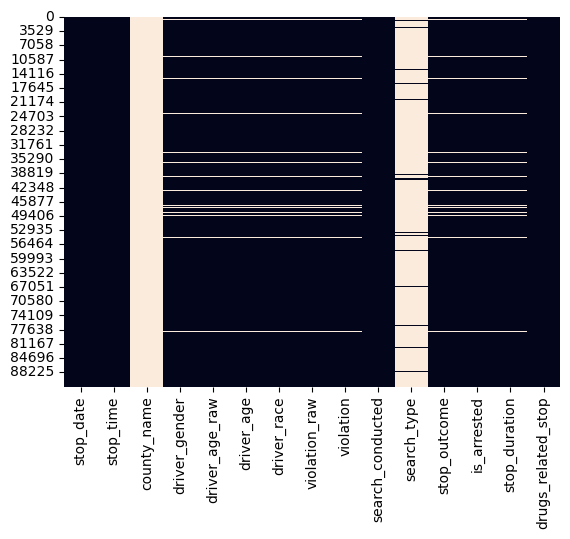

In [3]:
sns.heatmap(police.isnull(),cbar=False)

In [4]:
police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   county_name         0 non-null      float64
 3   driver_gender       86406 non-null  object 
 4   driver_age_raw      86414 non-null  float64
 5   driver_age          86120 non-null  float64
 6   driver_race         86408 non-null  object 
 7   violation_raw       86408 non-null  object 
 8   violation           86408 non-null  object 
 9   search_conducted    91741 non-null  bool   
 10  search_type         3196 non-null   object 
 11  stop_outcome        86408 non-null  object 
 12  is_arrested         86408 non-null  object 
 13  stop_duration       86408 non-null  object 
 14  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 9.3+

In [5]:
police.columns

Index(['stop_date', 'stop_time', 'county_name', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [6]:
police.drop(['county_name','search_type'], axis=1, inplace=True)

In [9]:
police = police.dropna(axis=0)

<Axes: >

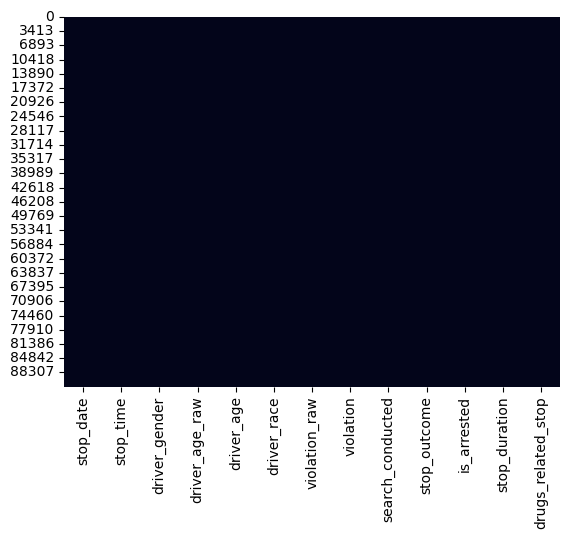

In [11]:
sns.heatmap(police.isnull(),cbar=False)

In [12]:
police.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


In [36]:
gender = police.groupby(by = ['driver_gender', 'search_conducted'])

In [37]:
gender.driver_race.count()

driver_gender  search_conducted
F              False               22993
               True                  471
M              False               59927
               True                 2722
Name: driver_race, dtype: int64

* "Males are stopped for searches more frequently than females."


* now we transform the "search_conducted" column

In [58]:
def trans_search(v):
    if v== False:
        return 'not searched'
    else:
        return 'searched'

In [64]:
police['search_conducted']=police['search_conducted'].apply(func = trans_search)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_11828\4214416132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  police['search_conducted']=police['search_conducted'].apply(func = trans_search)


* now the "search_conducted" column is converted to more representable value

In [65]:
police

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,not searched,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,not searched,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,not searched,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,not searched,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,not searched,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,2015-12-31,20:27,M,1986.0,29.0,White,Speeding,Speeding,not searched,Warning,False,0-15 Min,False
91737,2015-12-31,20:35,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,not searched,Warning,False,0-15 Min,False
91738,2015-12-31,20:45,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,not searched,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,M,1993.0,22.0,White,Speeding,Speeding,not searched,Citation,False,0-15 Min,False


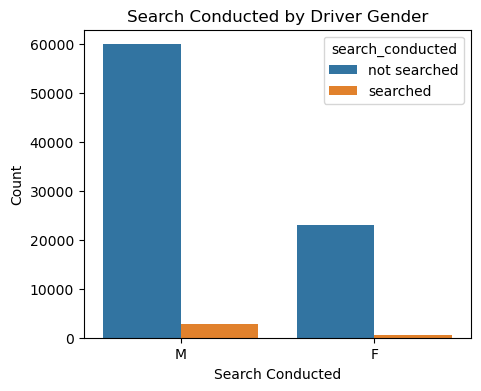

In [66]:

plt.figure(figsize=(5, 4))
sns.countplot(x='driver_gender', hue='search_conducted', data=police)


plt.xlabel('Search Conducted')
plt.ylabel('Count')
plt.title('Search Conducted by Driver Gender')


plt.show()

In [73]:
police['violation_raw']

0                              Speeding
1                              Speeding
2                              Speeding
3                      Call for Service
4                              Speeding
                      ...              
91736                          Speeding
91737    Equipment/Inspection Violation
91738           Other Traffic Violation
91739                          Speeding
91740                          Speeding
Name: violation_raw, Length: 86113, dtype: object

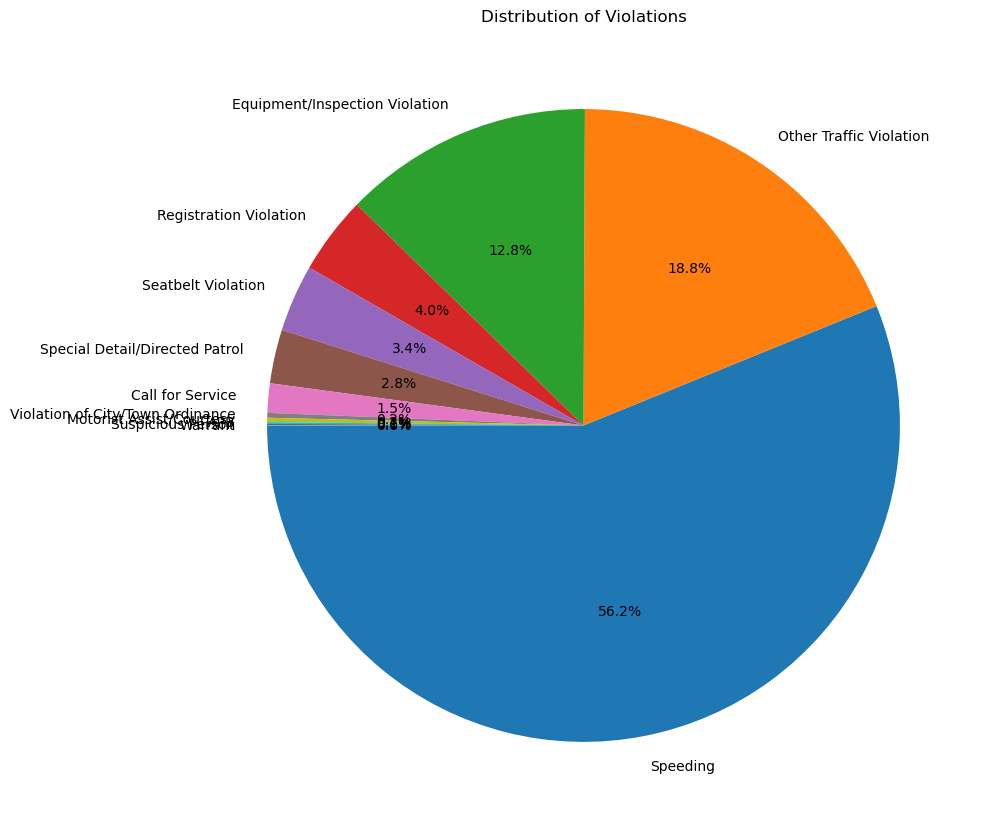

In [81]:
value_counts = police['violation_raw'].value_counts()

# Plot the pie chart
plt.figure(figsize=(10, 12))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=180)
plt.title('Distribution of Violations')
plt.tight_layout()

# Display the plot
plt.show()